# Monte Carlo Implementation
1. Importance Sampling
2. Rejection Sampling
3. Markov Chain Monte Carlo

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [91]:
sample_size = 1000
prior_paramaters = {
    'mu': 0,
    'sigma': 1
}

# distribution_supports -> interval [-5, 5]
interval_width = 10
samples = np.random.choice(interval_width, size=sample_size) - interval_width / 2

prior_samplings = norm.pdf(samples,
                           prior_paramaters['mu'],
                           prior_paramaters['sigma'])


likelihood_sample = [1/interval_width] * sample_size

In [92]:
posterior_numerator = prior_samplings * likelihood_sample
sampler_numerator = 1

importance_weights = posterior_numerator / sampler_numerator

# wanna approx E_p(x)
approx_mean_func = lambda x: x
approx_cdf_func = lambda x: x < cdf_upper
func_vals = approx_mean_func(samples)
func_hat = np.sum(importance_weights * func_vals) / np.sum(importance_weights)
print("Importance Sampling")
print("The estimated mean of posterior distribution is {}".format(func_hat))


cdf_upper = 4
approx_cdf_func = lambda x: x < cdf_upper
func_vals = approx_cdf_func(samples)
func_hat = np.sum(importance_weights * func_vals) / np.sum(importance_weights)
print("Importance Sampling")
print("The estimated cumulative probability of posterior distribution given x < {} is {}".format(cdf_upper, func_hat))

Importance Sampling
The estimated mean of posterior distribution is 0.04965368826701436
Importance Sampling
The estimated cumulative probability of posterior distribution given x < 4 is 0.9998860484695272


Rejection Sampling
Samples from true distribution p


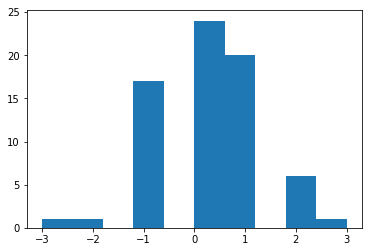

To notice that the inefficiency of this sampling,         the number of samples that are kept 70
However, the discarded number is 930


In [93]:
def compute_constant_c(posterior_num, sampler_num):
    c = max(posterior_num) / sampler_num + .1
    return c

c = compute_constant_c(posterior_numerator, sampler_numerator)
interval_uppers = c * sampler_numerator

masks = np.random.uniform(0, interval_uppers, size=sample_size) < posterior_numerator
kept_samples = samples[masks]
print("Rejection Sampling")
print("Samples from true distribution p")
plt.hist(kept_samples)
plt.show()

print("To notice that the inefficiency of this sampling, \
        the number of samples that are kept {}".format(len(kept_samples)))
print("However, the discarded number is {}".format(sample_size - len(kept_samples)))

In [100]:
state = 10

def get_next_state(current_state, interval_width):
    next_candidate = np.random.choice(interval_width) - interval_width / 2
    sampler_prob = 1 / interval_width
    pst_next = norm.pdf(next_candidate,
                        prior_paramaters['mu'],
                        prior_paramaters['sigma']) * 1 / interval_width
    pst_curr = norm.pdf(current_state,
                        prior_paramaters['mu'],
                        prior_paramaters['sigma']) * 1 / interval_width
    acceptance_prob = min(1, (pst_next) / (pst_curr))
    
    next_state = np.random.choice([next_candidate, current_state], 
                                  p=[acceptance_prob, 1-acceptance_prob])
    return next_state
    
samples_list = []
samples_list.append(state)
for _ in range(100):    
    state = get_next_state(state, interval_width)
    samples_list.append(state)

print("MCMC")
print("Samples from true distribution p")
print(samples_list)

MCMC
Samples from true distribution p
[10, -2.0, -1.0, -1.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, -1.0, -1.0, -1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
